# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | hovd
Processing Record 3 of Set 1 | linhares
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | beledweyne
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | selfoss
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | palmer
Processing Record 14 of Set 1 | altamira
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | malango
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | kencong
Processing Record 20 of Set 1 | canillo
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | aasiaat
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,57.02,45,75,15.01,CA,1714949034
1,hovd,48.0056,91.6419,57.22,17,2,7.92,MN,1714949546
2,linhares,-19.3911,-40.0722,73.65,94,12,3.76,BR,1714949546
3,grytviken,-54.2811,-36.5092,37.18,87,70,9.48,GS,1714949546
4,edinburgh of the seven seas,-37.0676,-12.3116,55.90,63,48,30.94,SH,1714949546


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,57.02,45,75,15.01,CA,1714949034
1,hovd,48.0056,91.6419,57.22,17,2,7.92,MN,1714949546
2,linhares,-19.3911,-40.0722,73.65,94,12,3.76,BR,1714949546
3,grytviken,-54.2811,-36.5092,37.18,87,70,9.48,GS,1714949546
4,edinburgh of the seven seas,-37.0676,-12.3116,55.90,63,48,30.94,SH,1714949546


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

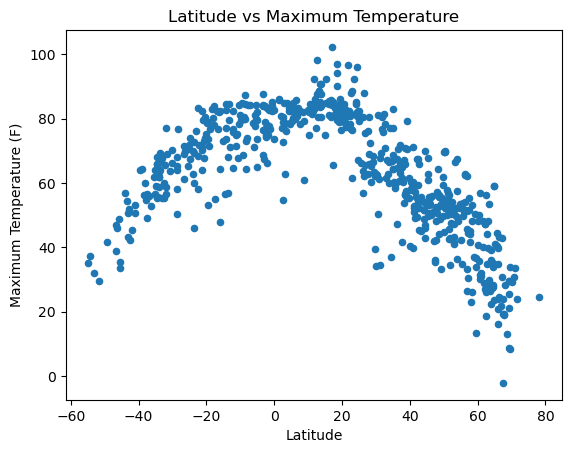

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp')

# Incorporate the other graph properties
plt.title("Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

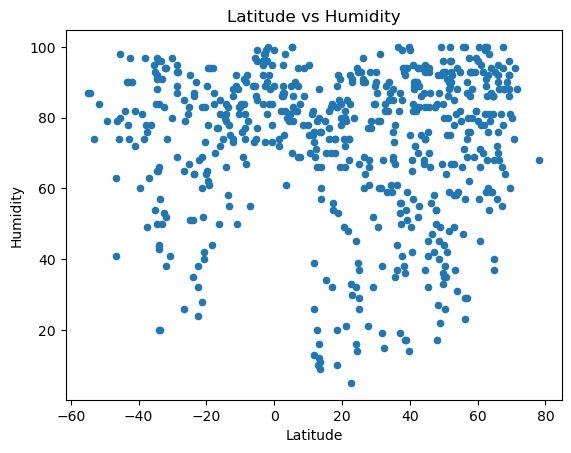

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity')

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

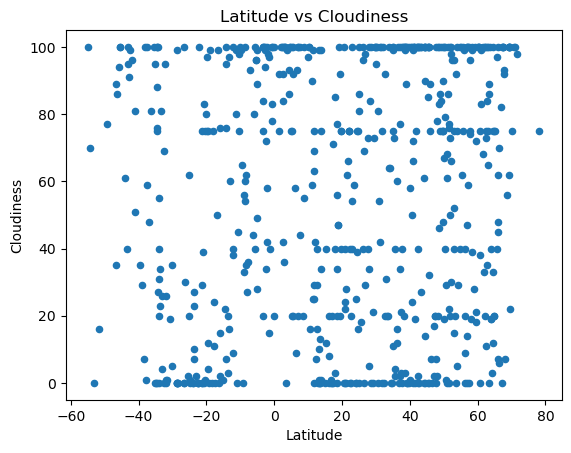

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness')

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

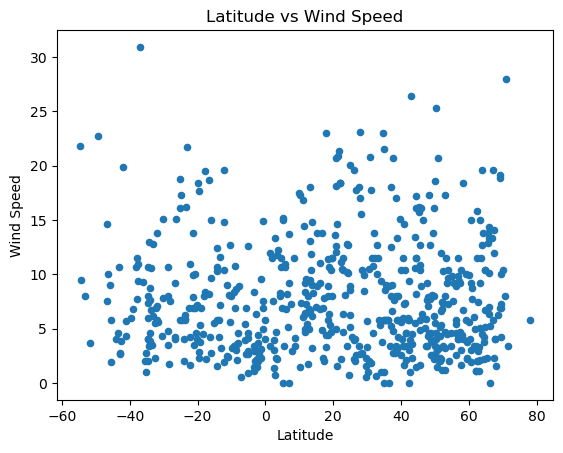

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed')

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression(hemisphere, weather_variable, ylabel):
    regression = linregress(hemisphere, weather_variable)
    fit = regression[0] * hemisphere + regression[1]
    print(f"The r-value is: {regression[2]}")

    plt.scatter(hemisphere, weather_variable)
    plt.plot(hemisphere, fit, "r--", label=f"y={round(regression[0],2)}x + {round(regression[1],2)}")
    plt.legend()
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs Latitude")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,57.02,45,75,15.01,CA,1714949034
1,hovd,48.0056,91.6419,57.22,17,2,7.92,MN,1714949546
5,beledweyne,4.7358,45.2036,78.82,81,100,11.54,SO,1714949546
6,dudinka,69.4058,86.1778,8.67,88,62,10.00,RU,1714949546
9,selfoss,63.9331,-20.9971,36.05,59,19,12.68,IS,1714949547


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,linhares,-19.3911,-40.0722,73.65,94,12,3.76,BR,1714949546
3,grytviken,-54.2811,-36.5092,37.18,87,70,9.48,GS,1714949546
4,edinburgh of the seven seas,-37.0676,-12.3116,55.90,63,48,30.94,SH,1714949546
7,afaahiti,-17.7500,-149.2833,84.07,84,24,19.55,PF,1714949546
8,puerto natales,-51.7236,-72.4875,29.64,84,16,3.71,CL,1714949547


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8655173156246874


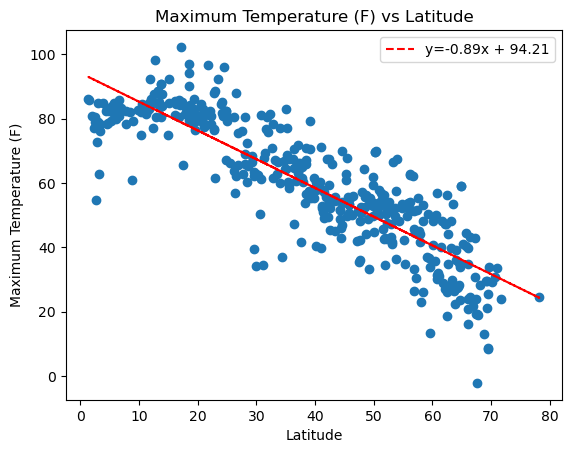

In [15]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Maximum Temperature (F)")

The r-value is: 0.7987855470800277


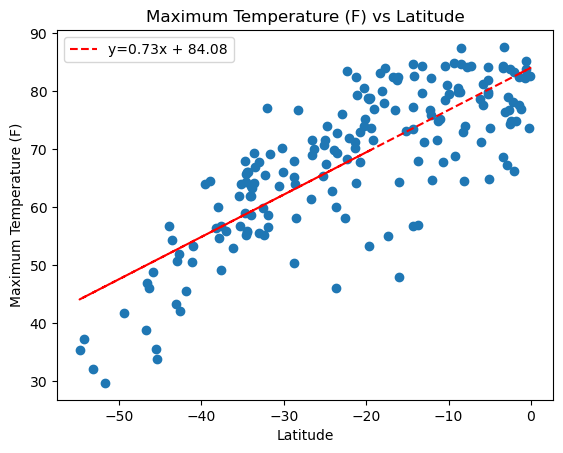

In [16]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Maximum Temperature (F)")

**Discussion about the linear relationship:** We can see that north hemisphere a negative corrolation, while the south hemisphere is positive. We can see that the temperature drops as you get closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10586520846336996


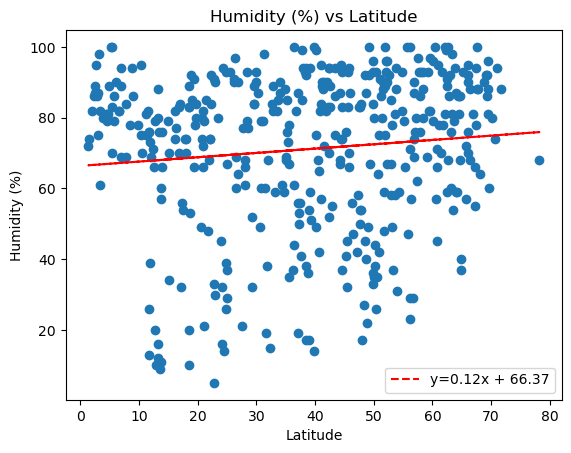

In [17]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Humidity (%)")

The r-value is: 0.20618219778459923


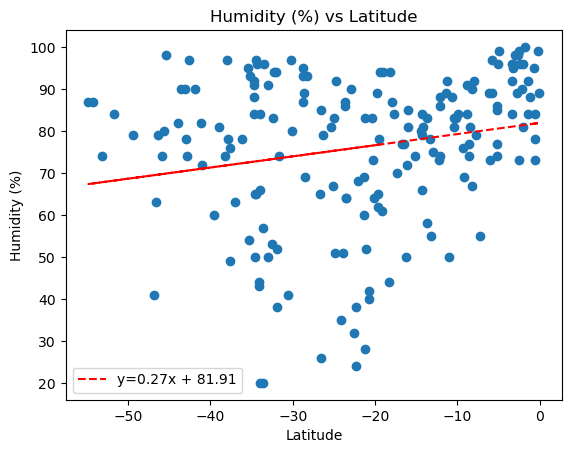

In [18]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Humidity (%)")

**Discussion about the linear relationship:** the correlation of humidity is either weak or nonexistant. Due to how scatter the graph.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.104250795049152


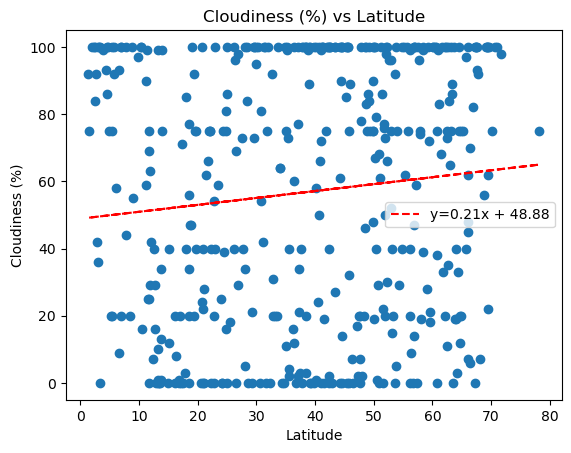

In [19]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Cloudiness (%)")

The r-value is: 0.11238925481340269


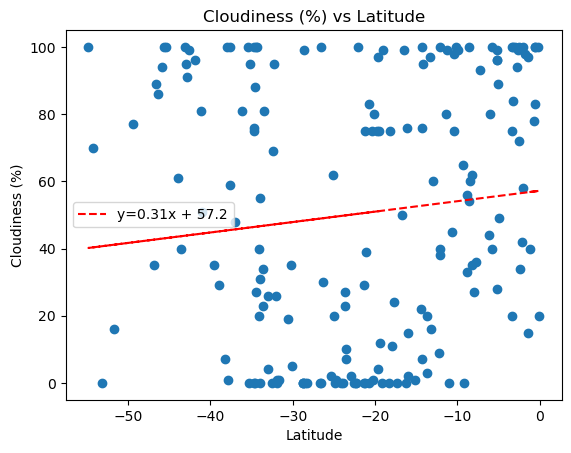

In [20]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness (%)")

**Discussion about the linear relationship:** There is no correlation between cloudiness and latitude is wither nonexistant in both hemispheres. both graphs does not appear to fit the data at all.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07520668523890507


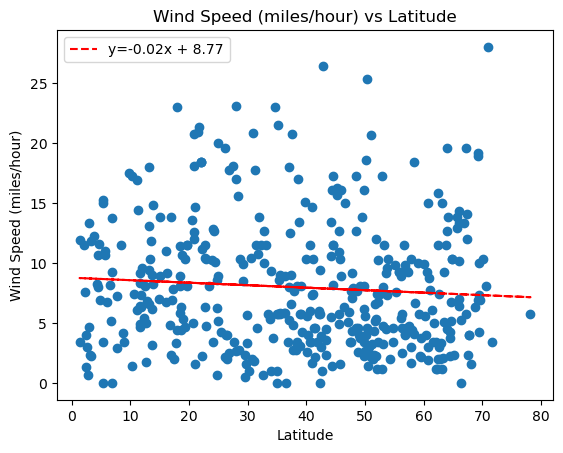

In [21]:
# Northern Hemisphere
regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Wind Speed (miles/hour)")

The r-value is: -0.23135841446796232


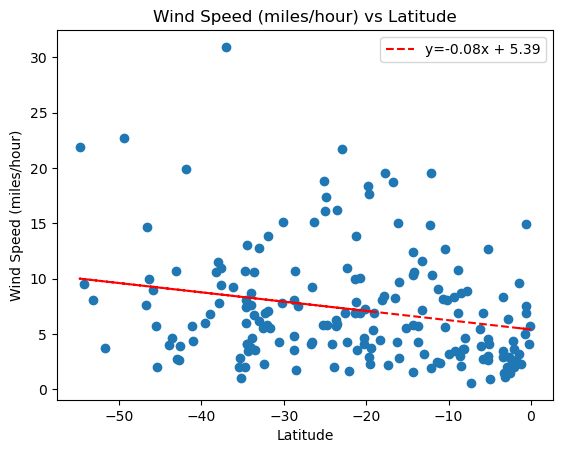

In [22]:
# Southern Hemisphere
regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed (miles/hour)")

**Discussion about the linear relationship:** Both north and south hemisphere shows weak or nonexistant.